In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
ground_truth = norm(loc=0, scale=.1)
assumed_prior = norm(loc=0, scale=5)

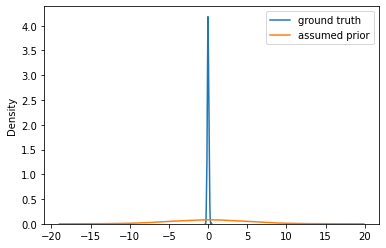

In [3]:
sns.kdeplot(ground_truth.rvs(1000), label='ground truth')
sns.kdeplot(assumed_prior.rvs(1000), label='assumed prior')
plt.legend()

<AxesSubplot:ylabel='Density'>

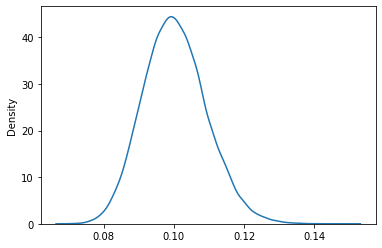

In [4]:
M = 10000000 # num experiments to simulate

# Each simulated experiment has a true parameter value, which we call theta:
thetas = ground_truth.rvs(M)

# Imagine the experiment draws 100 items in the sample, each drawn i.i.d. from N(theta, 1).
# The sample mean is therefore distributed as N(theta, 1 / 100), i.e. N(theta, 0.01).
variance_of_likelihood = np.random.lognormal(mean=np.log(.1), sigma=0.09, size=M)

observed_sample_means = norm(loc=thetas, scale=np.sqrt(variance_of_likelihood)).rvs()

#plt.scatter(thetas, observed_sample_means)
sns.kdeplot(np.random.choice(variance_of_likelihood, 50000))

In [5]:
# Now to compute the posteriors, and then store the interesting info in a DataFrame

prior_precision = 1/assumed_prior.var()
likelihood_precision = 1/variance_of_likelihood

posterior_mean = (assumed_prior.mean()*prior_precision + observed_sample_means*likelihood_precision) \
                   / (prior_precision+likelihood_precision)
posterior_variance = 1 / (prior_precision+likelihood_precision)

df = pd.DataFrame(dict(
    thetas = thetas,
    posterior_mean = posterior_mean,
    posterior_variance = posterior_variance,
))

df.head()

,thetas,posterior_mean,posterior_variance
0,0.150493,-0.050347,0.104626
1,-0.024138,0.039737,0.099489
2,-0.074258,-0.135731,0.097802
3,-0.102017,-0.195441,0.094146
4,-0.128877,-0.552201,0.118377


(2999, 3)


Text(0, 0.5, 'posterior variance')

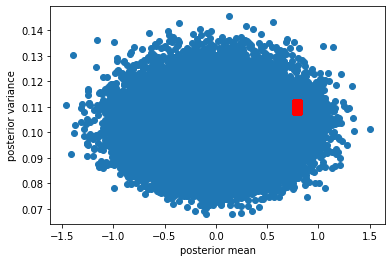

In [6]:
# Let's look at where those M posteriors were, and pick a subset
_ = df.sample(100000)
plt.scatter(_.posterior_mean, _.posterior_variance)

subset = df.query('abs(posterior_mean - 0.79) < 0.02 & abs(posterior_variance-0.11) < 0.002')
print(subset.shape)
subset.head()
plt.scatter(subset.posterior_mean, subset.posterior_variance, color='red')
plt.xlabel('posterior mean')
plt.ylabel('posterior variance')

2999 0.7892307762373619 0.10988451687214425


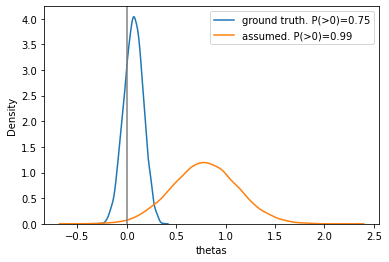

In [7]:
assert len(subset) > 1000, len(subset)
post_m = subset.posterior_mean.mean()
post_v = subset.posterior_variance.mean()

print(len(subset), post_m, post_v)
posterior = norm(loc=post_m, scale=np.sqrt(post_v)).rvs(10000)

sns.kdeplot(subset.thetas, label=f'ground truth. P(>0)={(subset.thetas>0).mean():.2g}')
sns.kdeplot(posterior, label=f'assumed. P(>0)={(posterior>0).mean():.2g}')
plt.legend()
plt.axvline(0, color='grey')